# Exercise 05 : Boxplot

In [178]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Remember how we tried to figure out if the newsfeed affected the behavior of the test and control users? Last time, we just calculated the average values. But do we know something about the variances? What if it changed too? What if we had some outliers? To answer those questions it may be handy to draw a boxplot.

- use the data from the file, read it to a dataframe and make any modification that you may find useful to solve the task

In [179]:
ab_test_df = pd.read_csv("../../data/ab-test.csv", header=0)
ab_test_df.sort_values('uid')
ab_test_df

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test
5,user_19,-148.000000,before,test
6,user_21,-78.500000,after,test
7,user_21,-112.500000,before,test
8,user_25,-127.500000,after,test
9,user_25,-69.333333,before,test


In [180]:
box_data=ab_test_df[['uid','group']].drop_duplicates(keep='first')
box_data['before']=list(ab_test_df[ab_test_df.time == 'before']['diff'])
box_data['after']=list(ab_test_df[ab_test_df.time == 'after']['diff'])
box_data

,uid,group,before,after
0,user_1,test,-6.000000,-103.333333
2,user_18,test,-3.500000,-10.000000
4,user_19,test,-148.000000,-82.333333
6,user_21,test,-112.500000,-78.500000
8,user_25,test,-69.333333,-127.500000
10,user_28,test,-53.000000,-136.500000
12,user_3,test,-70.000000,-158.500000
14,user_12,control,-103.000000,-75.000000
16,user_13,control,-15.500000,-81.500000
18,user_15,control,-3.000000,-32.000000


- the figsize is still the same(15, 8), you can choose whatever fontsize you like
- the color palette should be the same as in the example
- the fontsize of the title is 15
- the width of the box lines is 3, the width of the median lines is 2

In [181]:
control_before = box_data[box_data['group'] == 'control']['before']
control_after = box_data[box_data['group'] == 'control']['after']
test_before = box_data[box_data['group'] == 'test']['before']
test_after = box_data[box_data['group'] == 'test']['after']

In [182]:
box_data = [
    [control_before, control_after],  
    [test_before, test_after]  
]

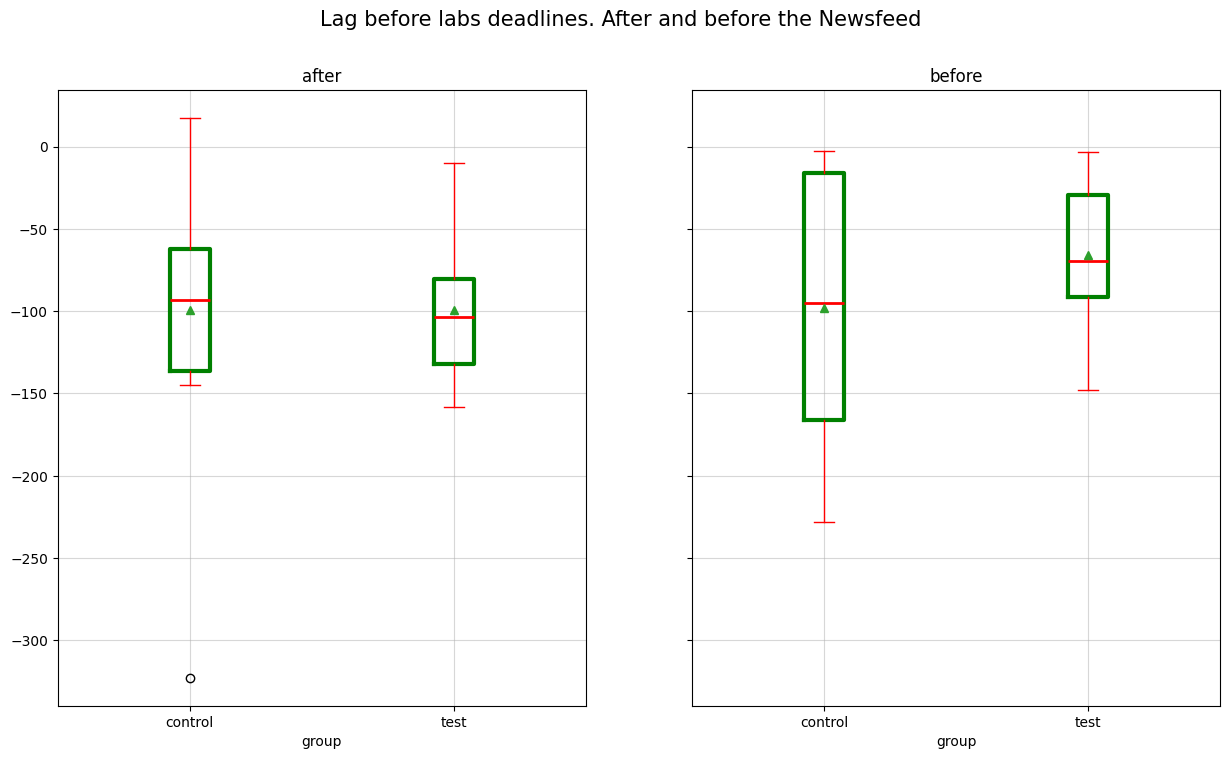

In [183]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
boxprops = dict(linewidth=3, color='green')
whiskerprops = dict(color='red')
medianprops = dict(linewidth=2, color='red')
capprops=dict(color='red')

ax1.boxplot(
    [control_after, test_after],
    tick_labels=['control', 'test'],
    showmeans=True,
    medianprops=medianprops,
    boxprops=boxprops,
    whiskerprops = whiskerprops,
    capprops=capprops,
)
ax1.set_title('after')
ax1.set_xlabel('group') 
ax1.grid(linestyle='solid', alpha=0.5)

ax2.boxplot(
    [control_before, test_before],
    tick_labels=['control', 'test'],
    showmeans=True,
    medianprops=medianprops,
    boxprops=boxprops,
    whiskerprops = whiskerprops,
    capprops=capprops,
)
ax2.set_title('before')
ax2.set_xlabel('group') 
ax2.grid(linestyle='solid', alpha=0.5)


plt.suptitle("Lag before labs deadlines. After and before the Newsfeed", fontsize=15)
plt.show()

## What was the IQR of the control group before the newsfeed? In your answer, put the approximate value that you can get just by looking at the graph, round it to the nearest 10

## Answer: apprx 150